In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers


In [18]:
data_train_path = 'Fruits_Vegetables/train'
data_test_path = 'Fruits_Vegetables/test'
data_val_path = 'Fruits_Vegetables/validation'

In [19]:
img_width = 180
img_height =180 

In [20]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=32,
    validation_split=False)

Found 3115 files belonging to 36 classes.


In [21]:
data_cat = data_train.class_names

In [22]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [23]:
data_val = tf.keras.utils.image_dataset_from_directory(data_val_path,
                                                       image_size=(img_height,img_width),
                                                       batch_size=32,
                                                        shuffle=False,
                                                       validation_split=False)

Found 351 files belonging to 36 classes.


In [24]:
data_test = tf.keras.utils.image_dataset_from_directory(
data_test_path,
    image_size=(img_height,img_width),
    shuffle=False,
    batch_size=32,
    validation_split=False
)

Found 359 files belonging to 36 classes.


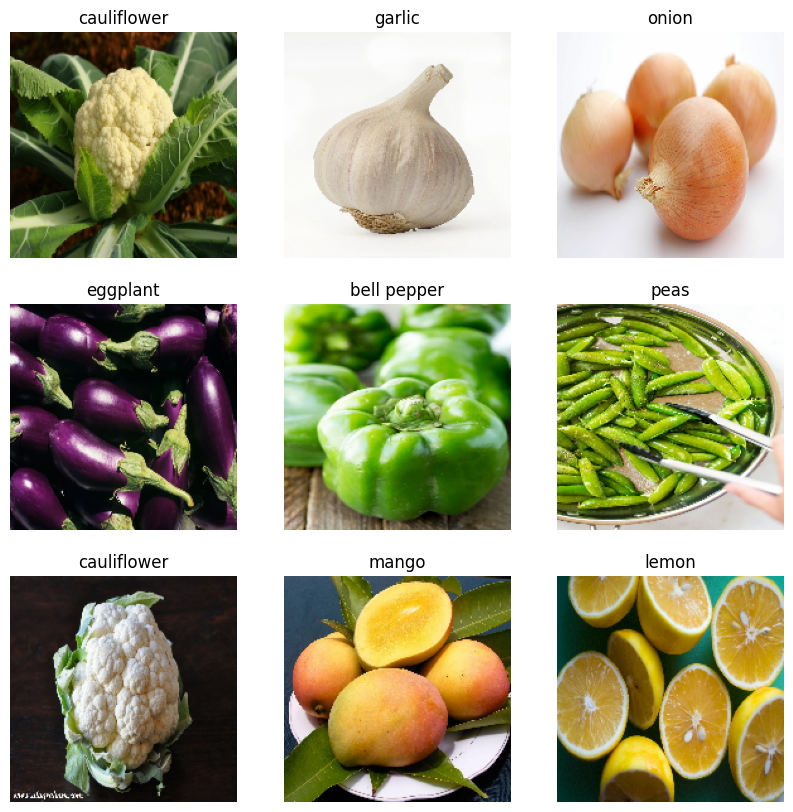

In [25]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [28]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
                  
])

In [29]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [30]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 404ms/step - accuracy: 0.0585 - loss: 4.0457 - val_accuracy: 0.2536 - val_loss: 2.5158
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 36s 357ms/step - accuracy: 0.2489 - loss: 2.6380 - val_accuracy: 0.6068 - val_loss: 1.5151
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 333ms/step - accuracy: 0.4055 - loss: 2.0642 - val_accuracy: 0.7151 - val_loss: 0.9905
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 340ms/step - accuracy: 0.5715 - loss: 1.4771 - val_accuracy: 0.8433 - val_loss: 0.6209
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 34s 341ms/step - accuracy: 0.7300 - loss: 0.9186 - val_accuracy: 0.9060 - val_loss: 0.3841
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 33s 336ms/step - accuracy: 0.8570 - loss: 0.4940 - val_accuracy: 0.9487 - val_loss: 0.2734
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 43s 430ms/step - accuracy: 0.9240 - loss: 0.2745 - val_accuracy: 0.9373 - val_loss: 0.2744
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 487ms/step - accuracy: 0.9272 - loss: 0.2544 - val_accu

Text(0.5, 1.0, 'Loss')

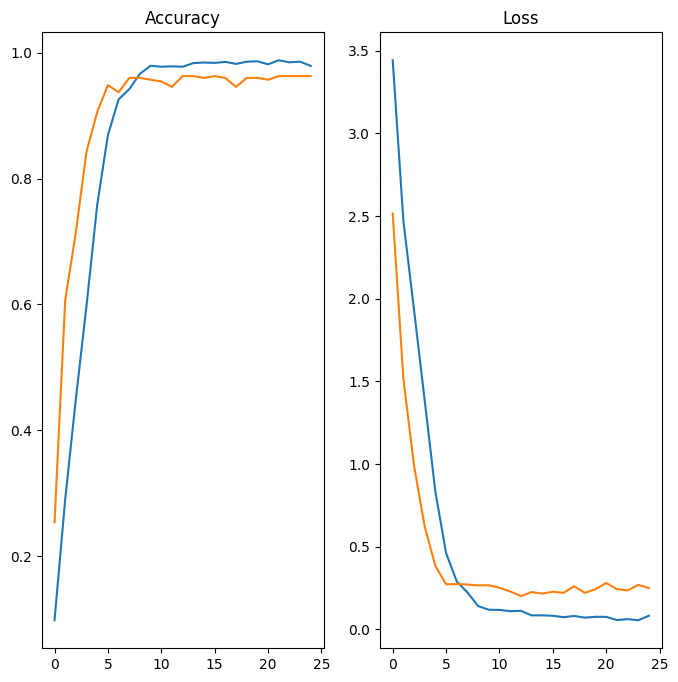

In [31]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,history.history['accuracy'],label = 'Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'],label = 'Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range,history.history['loss'],label = 'Training Loss')
plt.plot(epochs_range, history.history['val_loss'],label = 'Validation Loss')
plt.title('Loss')

In [32]:
image = 'corn.jpg'
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_bat=tf.expand_dims(img_arr,0)

In [33]:
predict = model.predict(img_bat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


In [34]:
score = tf.nn.softmax(predict)

In [35]:
print('Veg/Fruit in image is {} with accuracy of {:0.2f}'.format(data_cat[np.argmax(score)],np.max(score)*100))

Veg/Fruit in image is corn with accuracy of 78.56


In [36]:
model.save('Image_classify.keras')